<a href="https://www.kaggle.com/code/ranjanrakesh51/bankruptcy-randomforest?scriptVersionId=248290801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Metadata

| Attribute | Description                                                                                                         |
| --------- | ------------------------------------------------------------------------------------------------------------------- |
| Attr\_1   | Net profit / total assets                                                                                           |
| Attr\_2   | Total liabilities / total assets                                                                                    |
| Attr\_3   | Working capital / total assets                                                                                      |
| Attr\_4   | Current assets / short-term liabilities                                                                             |
| Attr\_5   | $(Cash + short-term securities + receivables − short-term liabilities) / (Operating expenses − depreciation)$ × 365 |
| Attr\_6   | Retained earnings / total assets                                                                                    |
| Attr\_7   | EBIT / total assets                                                                                                 |
| Attr\_8   | Book value of equity / total liabilities                                                                            |
| Attr\_9   | Sales / total assets                                                                                                |
| Attr\_10  | Equity / total assets                                                                                               |
| Attr\_11  | (Gross profit + extraordinary items + financial expenses) / total assets                                            |
| Attr\_12  | Gross profit / short-term liabilities                                                                               |
| Attr\_13  | (Gross profit + depreciation) / sales                                                                               |
| Attr\_14  | (Gross profit + interest) / total assets                                                                            |
| Attr\_15  | (Total liabilities × 365) / (Gross profit + depreciation)                                                           |
| Attr\_16  | (Gross profit + depreciation) / total liabilities                                                                   |
| Attr\_17  | Total assets / total liabilities                                                                                    |
| Attr\_18  | Gross profit / total assets                                                                                         |
| Attr\_19  | Gross profit / sales                                                                                                |
| Attr\_20  | (Inventory × 365) / sales                                                                                           |
| Attr\_21  | Sales (n) / Sales (n−1)                                                                                             |
| Attr\_22  | Profit on operating activities / total assets                                                                       |
| Attr\_23  | Net profit / sales                                                                                                  |
| Attr\_24  | Gross profit (in 3 years) / total assets                                                                            |
| Attr\_25  | (Equity − share capital) / total assets                                                                             |
| Attr\_26  | (Net profit + depreciation) / total liabilities                                                                     |
| Attr\_27  | Profit on operating activities / financial expenses                                                                 |
| Attr\_28  | Working capital / fixed assets                                                                                      |
| Attr\_29  | Logarithm of total assets                                                                                           |
| Attr\_30  | (Total liabilities − cash) / sales                                                                                  |
| Attr\_31  | (Gross profit + interest) / sales                                                                                   |
| Attr\_32  | (Current liabilities × 365) / cost of products sold                                                                 |
| Attr\_33  | Operating expenses / short-term liabilities                                                                         |
| Attr\_34  | Operating expenses / total liabilities                                                                              |
| Attr\_35  | Profit on sales / total assets                                                                                      |
| Attr\_36  | Total sales / total assets                                                                                          |
| Attr\_37  | (Current assets − inventories) / long-term liabilities                                                              |
| Attr\_38  | Constant capital / total assets                                                                                     |
| Attr\_39  | Profit on sales / sales                                                                                             |
| Attr\_40  | (Current assets − inventory − receivables) / short-term liabilities                                                 |
| Attr\_41  | Total liabilities / $(Profit on operating activities + depreciation) × (12 / 365)$                                  |
| Attr\_42  | Profit on operating activities / sales                                                                              |
| Attr\_43  | Rotation receivables + inventory turnover in days                                                                   |
| Attr\_44  | (Receivables × 365) / sales                                                                                         |
| Attr\_45  | Net profit / inventory                                                                                              |
| Attr\_46  | (Current assets − inventory) / short-term liabilities                                                               |
| Attr\_47  | (Inventory × 365) / cost of products sold                                                                           |
| Attr\_48  | EBITDA (profit on operating activities − depreciation) / total assets                                               |
| Attr\_49  | EBITDA (profit on operating activities − depreciation) / sales                                                      |
| Attr\_50  | Current assets / total liabilities                                                                                  |
| Attr\_51  | Short-term liabilities / total assets                                                                               |
| Attr\_52  | (Short-term liabilities × 365) / cost of products sold                                                              |
| Attr\_53  | Equity / fixed assets                                                                                               |
| Attr\_54  | Constant capital / fixed assets                                                                                     |
| Attr\_55  | Working capital                                                                                                     |
| Attr\_56  | (Sales − cost of products sold) / sales                                                                             |
| Attr\_57  | (Current assets − inventory − short-term liabilities) / (Sales − gross profit − depreciation)                       |
| Attr\_58  | Total costs / total sales                                                                                           |
| Attr\_59  | Long-term liabilities / equity                                                                                      |
| Attr\_60  | Sales / inventory                                                                                                   |
| Attr\_61  | Sales / receivables                                                                                                 |
| Attr\_62  | (Short-term liabilities × 365) / sales                                                                              |
| Attr\_63  | Sales / short-term liabilities                                                                                      |
| Attr\_64  | Sales / fixed assets                                                                                                |
| bankrupt  | Whether company went bankrupt at end of forecasting period (2013)                                                   |


# Libraries

In [1]:
!pip uninstall -q -y category-encoders cesium
!pip install -q -U scikit-learn imbalanced-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 64.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import (
train_test_split,cross_val_score,
cross_validate,GridSearchCV
)

from ipywidgets import interact
import ipywidgets as widgets
pd.set_option('display.max_columns',None)

# EDA

In [3]:
df1 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 1 year.csv',index_col=0)
df2 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 2 year.csv',index_col=0)
df3 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 3 year.csv',index_col=0)
df4 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 4 year.csv',index_col=0)
df5 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 5 year.csv',index_col=0)

In [4]:
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [5]:
df.isnull().sum()

bankrupt              0
forecast_window       0
Attr1                 8
Attr2                 8
Attr3                 8
                   ... 
Attr60             2152
Attr61              102
Attr62              127
Attr63              134
Attr64              812
Length: 66, dtype: int64

In [6]:
df.describe()

,bankrupt,forecast_window,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43405.000000,43405.000000,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.048174,3.060247,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991890e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107896e+03,6.003208,4.005020,7.370821,0.176847,1.162621e+03,8.636016,5.411439,0.111908,2.911241,105.085363,0.724357,-0.289102,2.147411,7.717806,-0.142514,1.074125e+03,8.311085e+02,14.825016,5.428857,3.578418e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,0.214137,1.283975,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,5.306782,67.590296,86.944053,5.713075,9.643193e+04,68.519998,507.322101,5.737645,48.692154,3.754517e+04,228.668931,5.155778,48.334974,7.988151,12.891440,66.224124,3.501237e+04,153.468628,0.826857,814.490078,48.748410,9.559356e+04,118.991185,120.975110,4.783398,62.984347,3058.429830,14.749270,39.256360,56.029879,1398.837543,15.990988,1.472188e+05,1.100510e+05,2428.236110,295.356200,3.314634e+04,5.097322,45.152174,307.382687,5.438357,639.887467,1213.797976,1220.884065,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,0.000000,1.000000,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,-463.890000,-6331.800000,-1460.600000,-517.480000,-9.632400e+06,-6331.800000,-0.412920,-517.480000,-1578.700000,-2.934000e+01,-1325.000000,-431.590000,-1578.700000,-463.890000,-500.930000,-6331.800000,-2.590100e+05,-3829.900000,-0.886060,-6351.700000,-1495.600000,-9.295600e+03,-19.197000,-1696.000000,-431.590000,-0.000857,-525.520000,-479.910000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-9.611000e+01,-542.560000,-9001.000000,-0.045239,-0.186610,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.000000,2.000000,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,0.015409,0.015072,0.023881,0.005783,2.225800e+02,0.073476,1.451650,0.005783,0.003870,1.541325e+01,0.908225,0.000000,0.002269,0.021336,0.150100,0.066743,4.504800e-02,0.038214,3.495100,0.082753,0.006961,4.639500e+01,2.819900,0.305725,0.006038,1.101100,1.142300,0.419830,0.004165,0.052696,0.026679,0.000000,6.660850e+01,3.487775e+01,0.019168,0.607455,1.6225

In [7]:
df = pd.get_dummies(df, columns=['forecast_window'], prefix='fw')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bankrupt  43405 non-null  int64  
 1   Attr1     43397 non-null  float64
 2   Attr2     43397 non-null  float64
 3   Attr3     43397 non-null  float64
 4   Attr4     43271 non-null  float64
 5   Attr5     43316 non-null  float64
 6   Attr6     43397 non-null  float64
 7   Attr7     43397 non-null  float64
 8   Attr8     43311 non-null  float64
 9   Attr9     43396 non-null  float64
 10  Attr10    43397 non-null  float64
 11  Attr11    43361 non-null  float64
 12  Attr12    43271 non-null  float64
 13  Attr13    43278 non-null  float64
 14  Attr14    43397 non-null  float64
 15  Attr15    43369 non-null  float64
 16  Attr16    43310 non-null  float64
 17  Attr17    43311 non-null  float64
 18  Attr18    43397 non-null  float64
 19  Attr19    43277 non-null  float64
 20  Attr20    43278 non-null  fl

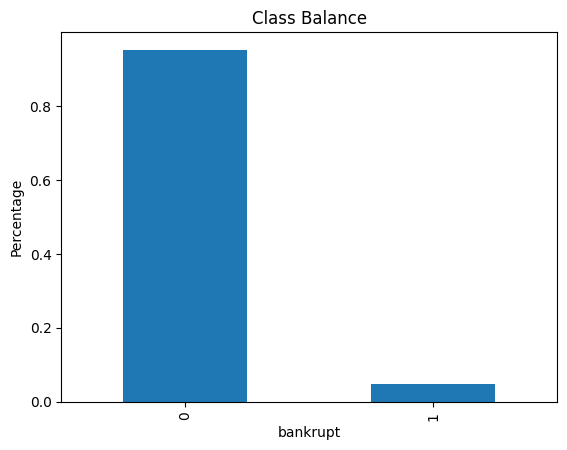

In [8]:
df['bankrupt'].value_counts(normalize=True).plot(kind='bar')
plt.title('Class Balance')
plt.ylabel('Percentage');

# Split

In [9]:
X = df.drop(columns = 'bankrupt')
y = df['bankrupt']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42
)

# RandomForestClassifier

In [11]:
# Pipeline with RandomOverSampler

rf_ros = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("ros", RandomOverSampler(random_state=42)),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [12]:
# Pipeline With SMOTE

rf_smote = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("smote", SMOTE(random_state=42)),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])


In [13]:
# Hyper parameters
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}


In [14]:
# For ROS hyperparameter tuning
grid_ros = GridSearchCV(rf_ros, param_grid, cv=5, n_jobs=-1,verbose = 1)
grid_ros.fit(X_train, y_train)

print("Best Params:", grid_ros.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}


In [15]:
# for SMOTE hyperparameter tuning
grid_smote = GridSearchCV(rf_smote, param_grid, cv=5, n_jobs=-1,verbose=1)
grid_smote.fit(X_train, y_train)

print("Best Params:", grid_ros.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}


In [16]:
cv_results = pd.DataFrame(grid_ros.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_split,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.399080,0.293668,0.142516,0.032161,None,2,100,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.963139,0.963427,0.960403,0.964723,0.960829,0.962504,0.001637,4
1,76.244896,0.379900,0.236769,0.026629,None,2,200,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.963427,0.963571,0.960835,0.964579,0.960685,0.962619,0.001570,3
2,37.811461,0.327943,0.125780,0.005740,None,5,100,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.963427,0.963427,0.960691,0.965011,0.960974,0.962706,0.001638,2
3,72.701738,0.487225,0.197334,0.004909,None,5,200,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.964003,0.963715,0.960979,0.964723,0.960974,0.962879,0.001588,1
4,29.132208,0.267384,0.099882,0.002585,10,2,100,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.917495,0.919798,0.920230,0.924262,0.916619,0.919681,0.002663,9
5,57.593533,0.229516,0.145880,0.010064,10,2,200,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.915479,0.918790,0.922246,0.922822,0.916763,0.919220,0.002910,12
6,29.218373,0.286652,0.084731,0.005159,10,5,100,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.916631,0.919798,0.920086,0.924550,0.916043,0.919422,0.003036,11
7,56.848395,0.301173,0.165687,0.057485,10,5,200,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.915191,0.919798,0.922534,0.922534,0.917051,0.919422,0.002934,10
8,35.340217,0.275171,0.105647,0.006137,20,2,100,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.962275,0.963139,0.959539,0.963139,0.960685,0.961756,0.001425,7
9,69.656054,0.607774,0.186395,0.014275,20,2,200,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.962563,0.964147,0.959251,0.964291,0.960109,0.962072,0.002063,5


In [17]:
cv_results = pd.DataFrame(grid_smote.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_split,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,60.700666,0.716017,0.142342,0.006921,None,2,100,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.958819,0.960835,0.955076,0.959251,0.955789,0.957954,0.002177,4
1,117.995133,1.361948,0.245767,0.020999,None,2,200,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.959107,0.960259,0.955652,0.960403,0.957805,0.958645,0.001765,1
2,58.660010,0.375952,0.160312,0.039365,None,5,100,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.958963,0.958819,0.956515,0.958531,0.956365,0.957839,0.001151,5
3,116.117683,0.960427,0.258540,0.022059,None,5,200,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.959683,0.958963,0.956228,0.958675,0.956797,0.958069,0.001325,2
4,43.232691,0.518037,0.090600,0.006082,10,2,100,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.935637,0.929014,0.936789,0.932901,0.931452,0.933159,0.002810,12
5,85.202040,0.796083,0.152760,0.008299,10,2,200,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.936357,0.931749,0.938949,0.932901,0.934044,0.934800,0.002574,10
6,43.534082,0.325655,0.093935,0.011437,10,5,100,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.937077,0.931174,0.936069,0.933189,0.932028,0.933907,0.002291,11
7,85.257398,0.701054,0.152527,0.009233,10,5,200,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.938373,0.930886,0.937509,0.933765,0.935052,0.935117,0.002685,9
8,57.331428,0.374356,0.139700,0.012159,20,2,100,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.957379,0.958099,0.955796,0.958963,0.955213,0.957090,0.001401,8
9,113.654306,1.097862,0.234338,0.020214,20,2,200,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.958531,0.959251,0.955220,0.957811,0.955933,0.957349,0.001534,7


In [18]:
# Extract best hyperparameters
print(grid_ros.best_score_)
print(grid_ros.best_estimator_)
print(grid_ros.predict(X_test))
grid_ros.best_params_

0.9628786457452068
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('ros', RandomOverSampler(random_state=42)),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=200,
                                        random_state=42))])
[0 0 0 ... 0 0 0]


{'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}

In [19]:
# Extract best hyperparameters
print(grid_smote.best_score_)
print(grid_smote.best_estimator_)
print(grid_smote.predict(X_test))
grid_smote.best_params_

0.9586452931691734
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])
[0 0 0 ... 0 0 0]


{'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

# Confusion Matrix

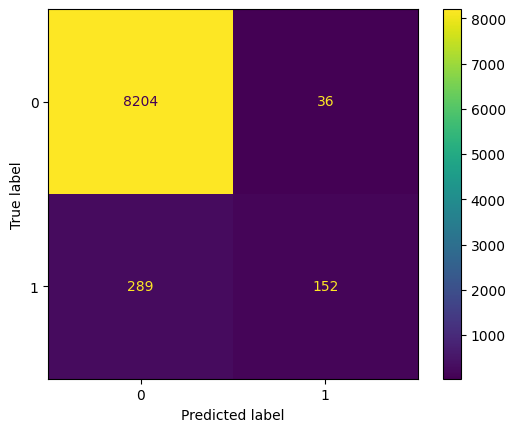

In [20]:
# Confusion Matrix for RandomOverSampler model

ConfusionMatrixDisplay.from_estimator(grid_ros,X_test,y_test);

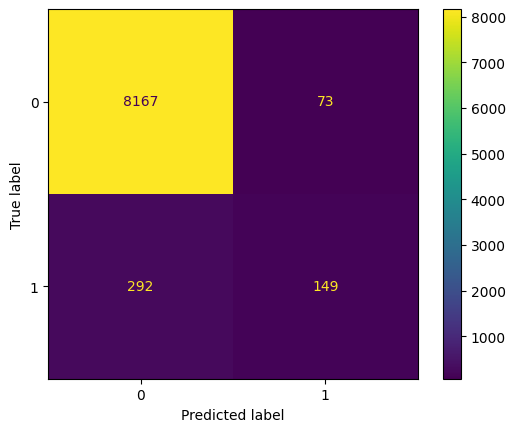

In [21]:
# Confusion Matrix for SMOTE model

ConfusionMatrixDisplay.from_estimator(grid_smote,X_test,y_test);

# Scores

In [22]:
# Scores for ROS

best_model_ros = grid_ros.best_estimator_
y_pred = best_model_ros.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8240
           1       0.81      0.34      0.48       441

    accuracy                           0.96      8681
   macro avg       0.89      0.67      0.73      8681
weighted avg       0.96      0.96      0.96      8681



In [23]:
# Scores for SMOTE

best_model_smote = grid_smote.best_estimator_
y_pred = best_model_smote.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8240
           1       0.67      0.34      0.45       441

    accuracy                           0.96      8681
   macro avg       0.82      0.66      0.71      8681
weighted avg       0.95      0.96      0.95      8681



### It seems that RandomOverSampler with 
### {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
### performed slightly well than SMOTE model 

In [24]:
# Selecting RandomOverSampler model with best estimator
model = grid_ros.best_estimator_
model

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('ros', RandomOverSampler(random_state=42)),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=200,
                                        random_state=42))])

In [25]:
def make_cnf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    y_pred = y_pred_proba > threshold
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)


thresh_widget = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.01)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

# Feature Importances

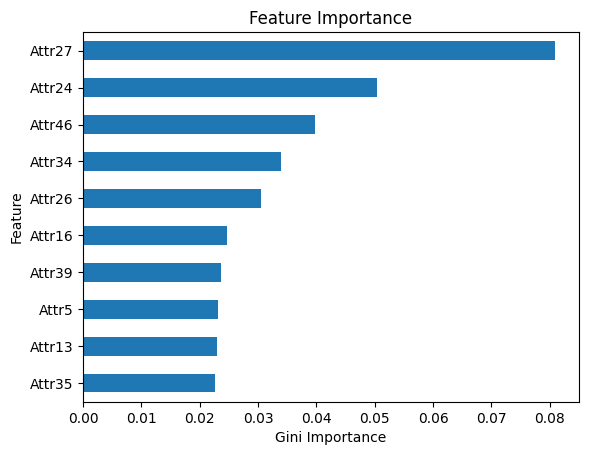

In [26]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = model.named_steps['clf'].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()

# Plot 10 most important features

feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# Conclusion 

* The model identified the following financial ratios as the strongest predictors of bankruptcy risk:

  * **Attr_27**: Profit on operating activities / financial expenses
    - This ratio reflects how easily a company can cover its financial obligations with its core operating profit.
    - Higher values indicate financial strength and lower bankruptcy risk.

  * **Attr_24**: Gross profit (in 3 years) / total assets
    - A measure of long-term profitability relative to asset base.
    - Consistent gross profit over 3 years suggests stability and reduces risk.

  * **Attr_46**: (Current assets − inventory) / short-term liabilities
    * A refined liquidity ratio showing how easily a company can pay short-term obligations using its most liquid assets.
    * Lower inventory reliance and stronger liquid asset coverage correlate with lower failure probability.

**The most influential factors in bankruptcy prediction are profitability, long-term financial performance, and liquidity health — all foundational aspects of a company’s financial integrity.**